<a href="https://colab.research.google.com/github/Saber0275/Polynomial-Regression/blob/main/Polynomial_Regression_(Non_linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
<div class="alert alert-info">
<h1><center><font color=red> Polynomial Regression (Non-linear) <font></center></h1>

- By Saber Saharkhiz
</div>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Statistical tests
import scipy.stats as stats

import warnings   
warnings.filterwarnings('ignore')

#date of coding
import datetime
d= datetime.datetime.now()
d.strftime('%Y-%m-%d %H:%M:%S')

'2022-10-23 02:51:51'

In [2]:
#Read the csv file by downloading the required dataset:

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-10-23 02:52:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   195KB/s    in 0.4s    

2022-10-23 02:52:03 (195 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# ***EDA***

In [4]:
shape= df.shape  #1067 rows and 13 columns
size= df.size  #rows*columns → number of total elements in Dataset
shape, size

((1067, 13), 13871)

In [5]:
list(df.columns)

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
#Check the categorical values:

def check_level(df):
    '''Checking dataset categorical features levels'''
    print("Checking the categories levels of categorical features: \n")
    for i in df.columns:
        if (df[i].dtype == object):
            print('These are the categories of \'',i,' \':\n',df[i].unique(), '\n')
    del i 
check_level(df)

Checking the categories levels of categorical features: 

These are the categories of ' MAKE  ':
 ['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO'] 

These are the categories of ' MODEL  ':
 ['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATTRO'
 'Q5' 'Q5 HYBRID' 'Q5 TDI CLEAN DIESEL' 'Q7' 'Q7 TDI CLEAN DIESEL' 'R8'
 'R8 SPYDER' 'RS5' 'RS5 CABRIOLET' 'RS7' 'S4' 'S5' 'S5 CABRIOLET' 'S6'
 'S7

In [8]:
#only numerical features:

df1 = df.drop(['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis=1)

In [9]:
#Calculating IQR:


for col in df1.columns:
    Q1 = df1[col].quantile(.25)
    Q3 = df1[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of MODELYEAR : 0
IQR of ENGINESIZE : 2
IQR of CYLINDERS : 4
IQR of FUELCONSUMPTION_CITY : 5
IQR of FUELCONSUMPTION_HWY : 3
IQR of FUELCONSUMPTION_COMB : 4
IQR of FUELCONSUMPTION_COMB_MPG : 10
IQR of CO2EMISSIONS : 87


In [10]:
#range of Max-Min:

for col in df1.columns:
    range = df1[col].max() - df1[col].min()
    print('range of %s : %d'%(col,range))

range of MODELYEAR : 0
range of ENGINESIZE : 7
range of CYLINDERS : 9
range of FUELCONSUMPTION_CITY : 25
range of FUELCONSUMPTION_HWY : 15
range of FUELCONSUMPTION_COMB : 21
range of FUELCONSUMPTION_COMB_MPG : 49
range of CO2EMISSIONS : 380


In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


# **Normalization Test (Guassian distribution):**

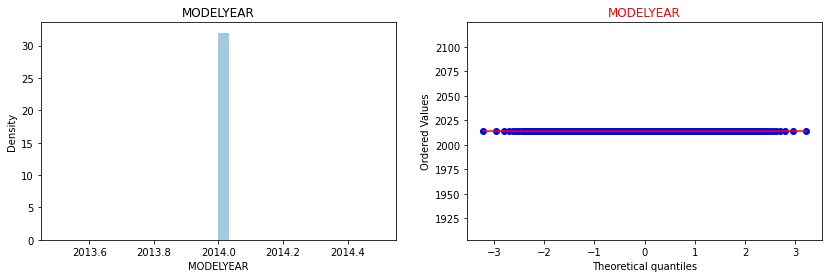

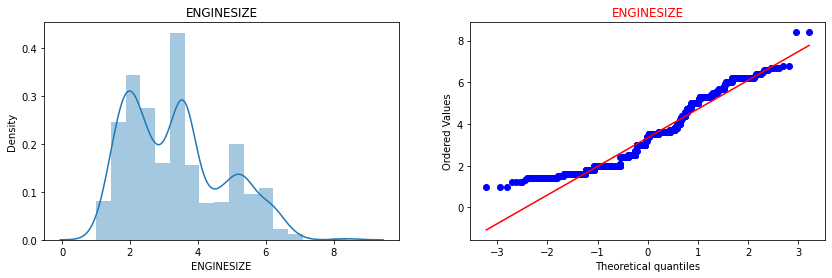

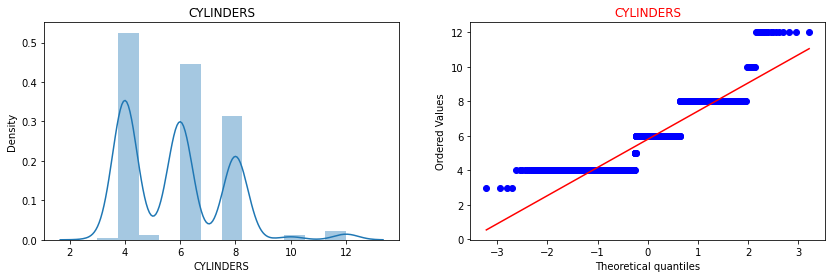

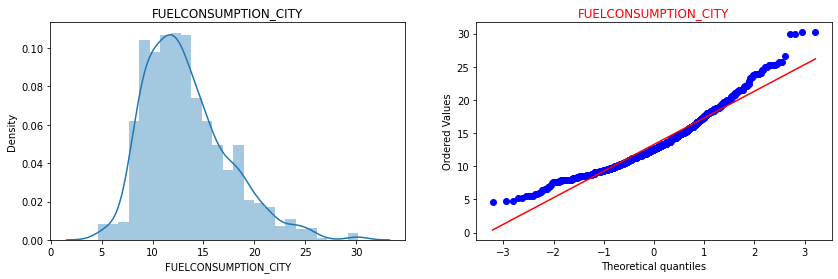

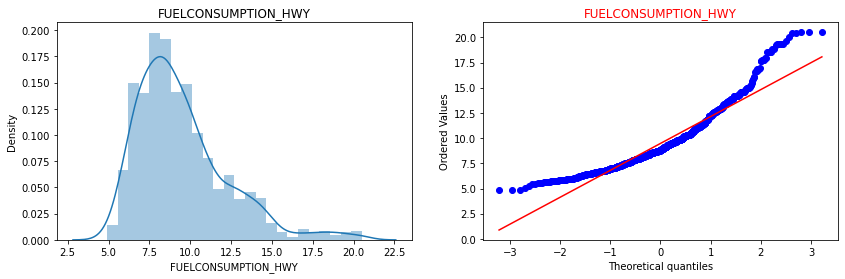

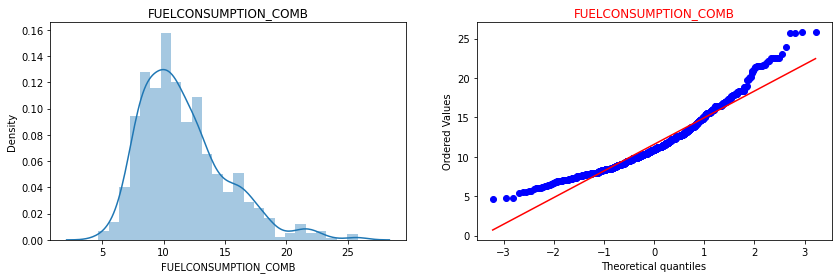

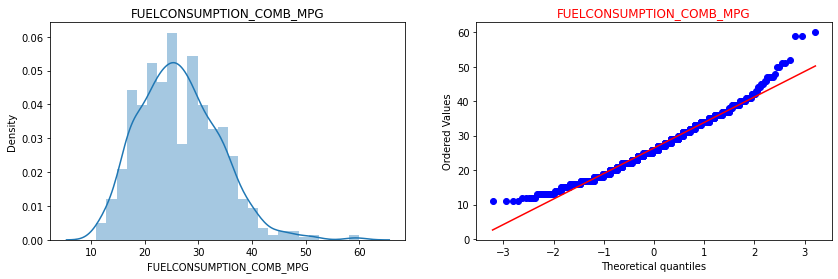

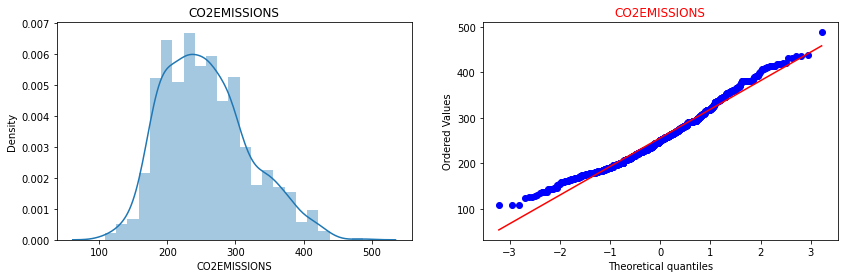

In [18]:
#a) qq plot and histogram

cols = df1.columns
for c in cols:
    if df1[c].dtypes!='object':
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        sns.distplot(df1[c])
        plt.title(c)
        
        
        plt.subplot(122)
        stats.probplot(df1[c], dist="norm", plot=plt)
        plt.title(c, color='r')

        plt.show()

In [19]:
#for shapiro test:

b= df1.columns
for index, element in list(enumerate(b, start=1)):
    print(index, element, end= " ,    ")

1 MODELYEAR ,    2 ENGINESIZE ,    3 CYLINDERS ,    4 FUELCONSUMPTION_CITY ,    5 FUELCONSUMPTION_HWY ,    6 FUELCONSUMPTION_COMB ,    7 FUELCONSUMPTION_COMB_MPG ,    8 CO2EMISSIONS ,    

In [20]:
#b) Shapiro test:

from scipy.stats import shapiro

col= df1.columns
for index, i in enumerate(col, start=1):
    stat, p_normal = shapiro(df1[i])
    print(r'Shapiro\'s Statistics(W)=%.3f, p=%.3f' % (stat, p_normal))
    print(index, p_normal >.05) 

#Only 1 feature is normally distributed when P-value is greater than 0.05 

Shapiro\'s Statistics(W)=1.000, p=1.000
1 True
Shapiro\'s Statistics(W)=0.939, p=0.000
2 False
Shapiro\'s Statistics(W)=0.821, p=0.000
3 False
Shapiro\'s Statistics(W)=0.952, p=0.000
4 False
Shapiro\'s Statistics(W)=0.910, p=0.000
5 False
Shapiro\'s Statistics(W)=0.938, p=0.000
6 False
Shapiro\'s Statistics(W)=0.977, p=0.000
7 False
Shapiro\'s Statistics(W)=0.977, p=0.000
8 False


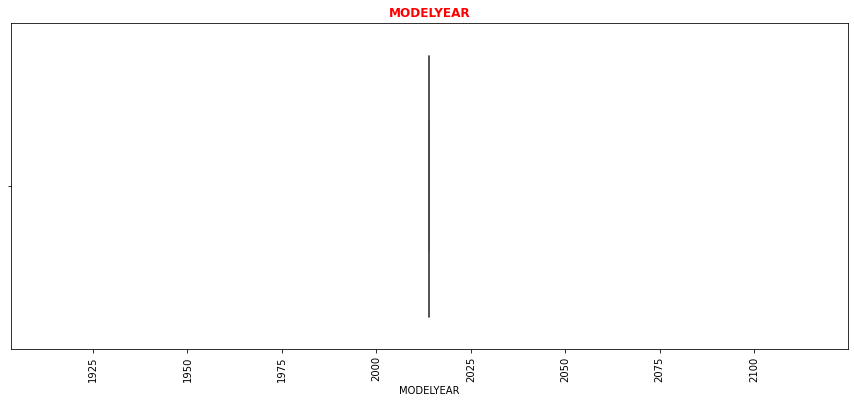

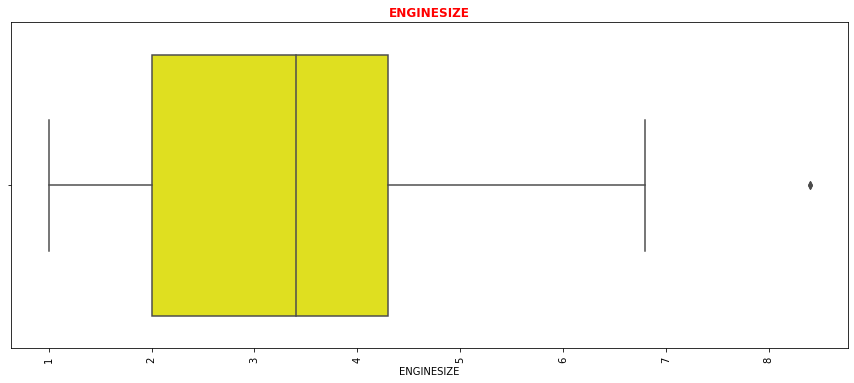

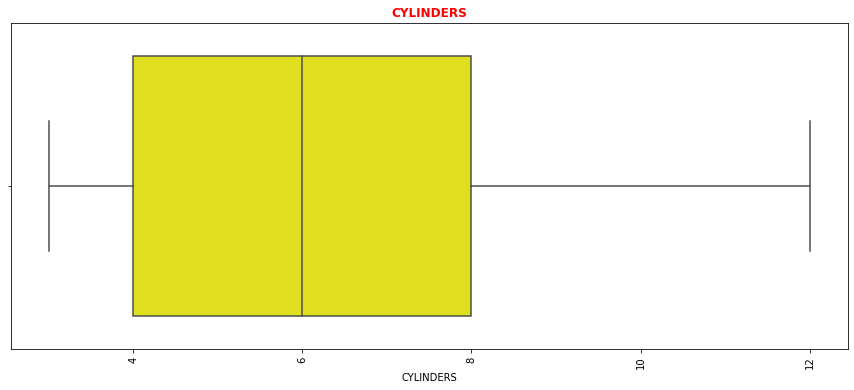

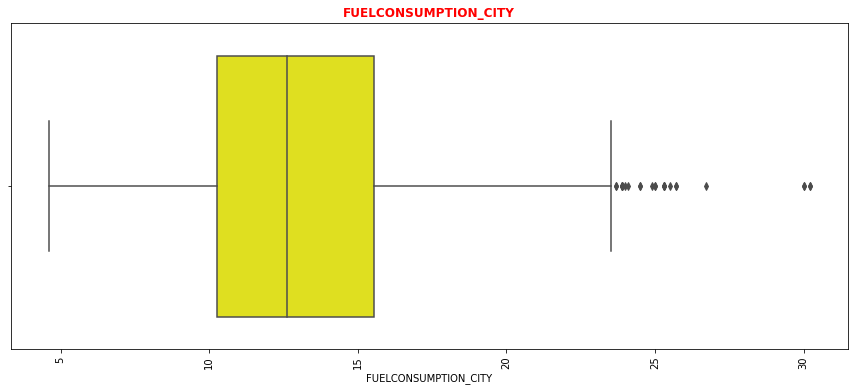

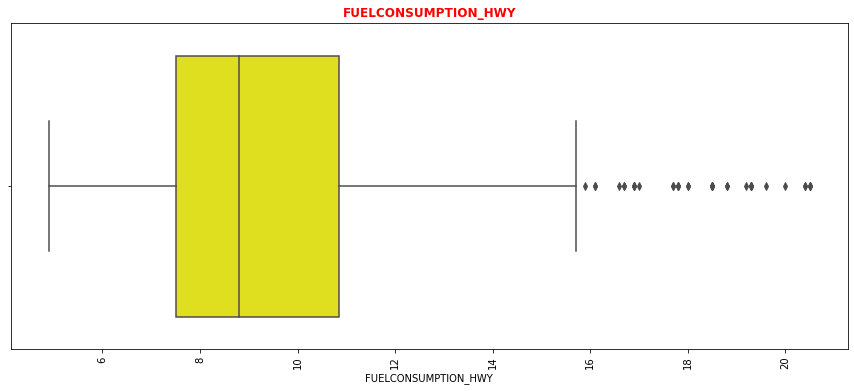

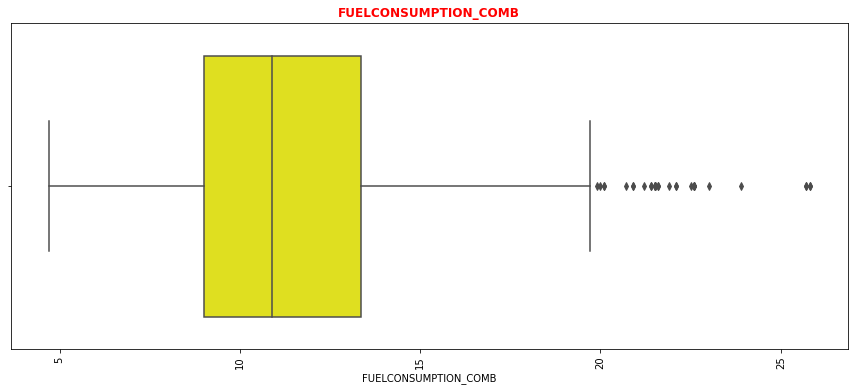

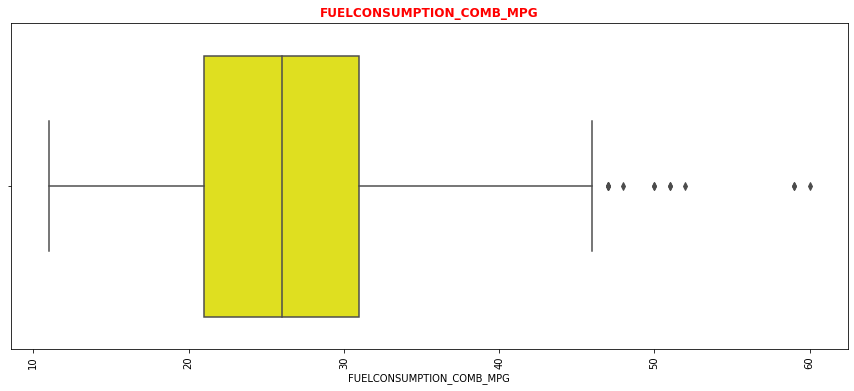

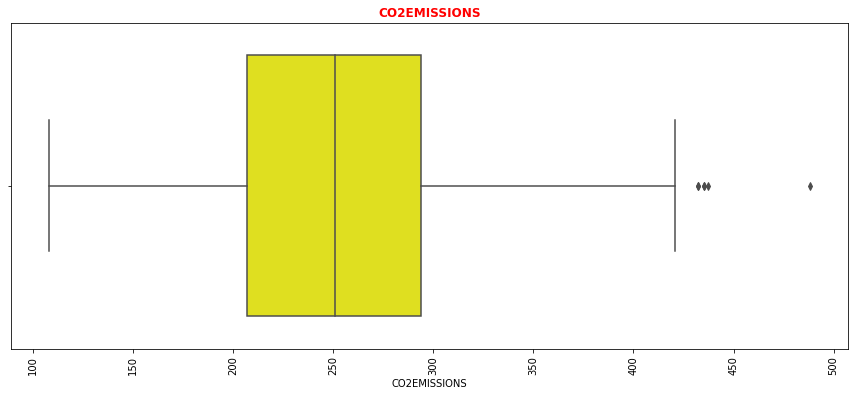

In [21]:
#Outliers by BoxPlot:
#1)

for c in df1.columns:
    if df1[c].dtypes!='object':
        plt.figure(figsize=(15,6))
        sns.boxplot(df1[c], color="yellow")
        plt.xticks(rotation= 90)
        plt.title(c, fontweight= 'bold', color='r')
        plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

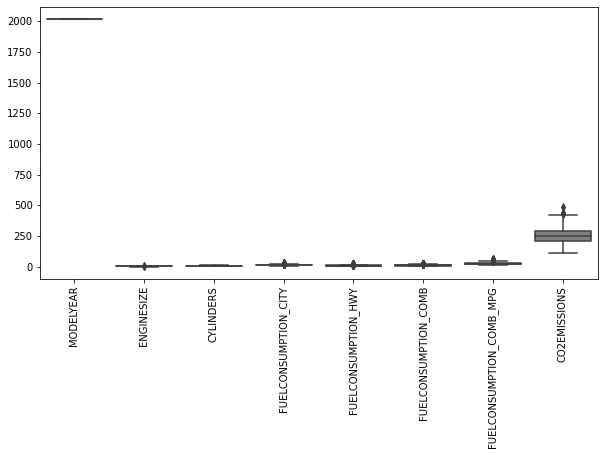

In [25]:
#2) outliers:

plt.figure(figsize = (10, 5))
sns.boxplot(data = df1)
plt.xticks(rotation= 90)

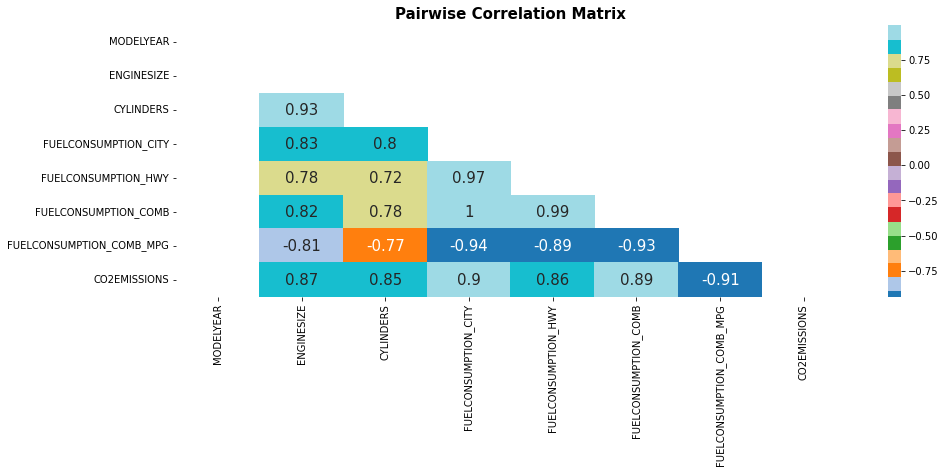

In [32]:
corr = df1.corr()

plt.figure(figsize= (15,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, annot_kws={"size": 15}, cmap = "tab20", mask=mask, center=0)
plt.title("Pairwise Correlation Matrix", fontsize=15, fontweight= 'bold')
plt.show()

# **significant Correlations:** 

In [57]:
#A

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=1, linecolor='blue', cbar=1)

In [58]:
#B

def corr_sig(df1=None):
    p_matrix = np.zeros(shape=(df1.shape[1],df1.shape[1]))
    for col in df1.columns:
        for col2 in df1.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df1[col],df1[col2])
            p_matrix[df1.columns.to_list().index(col),df1.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(df1)
mask = np.invert(np.tril(p_values<0.05))

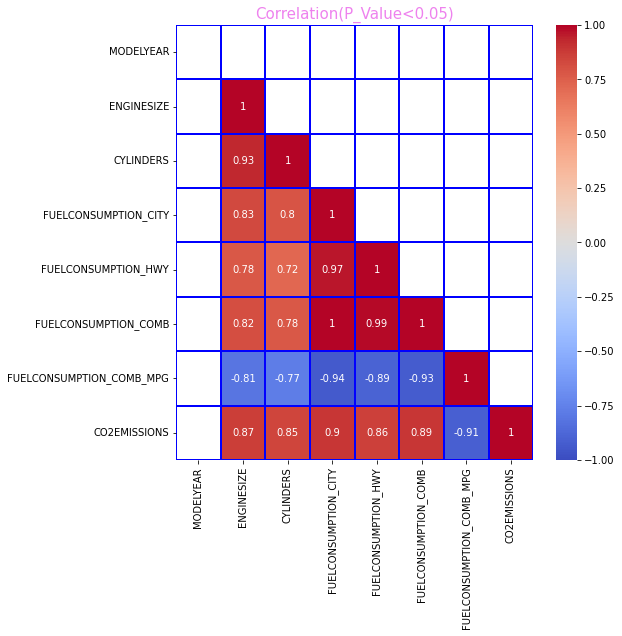

In [59]:
#C 

#1)All in all: Plotting with significance filter  ((► numbers of all behaviors are significantly correlated in all cycles: 275)))
corr = df1.corr()                            # get correlation
p_values = corr_sig(df1)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr, mask)
plt.title(label="Correlation(P_Value<0.05)",
          fontsize=15,
          color="violet")

plt.show()

In [60]:
#Correlation of "CO2EMISSIONS" to other behaviors with its P value
#1)

df_corr= pd.DataFrame(columns=['r', 'p'])

for col in df1:
    if pd.api.types.is_numeric_dtype(df1[col]):
        r, p = stats.pearsonr(df1.CO2EMISSIONS, df1[col])
        df_corr.loc[col]= [round(r, 3), round(p,3)]

In [61]:
#statistically significant correlations by pValue ► "CO2EMISSIONS" to other behaviors:

dfsig=df_corr[(df_corr.p<= 0.05)]
dfsig

,r,p
ENGINESIZE,0.874,0.0
CYLINDERS,0.850,0.0
FUELCONSUMPTION_CITY,0.898,0.0
FUELCONSUMPTION_HWY,0.862,0.0
FUELCONSUMPTION_COMB,0.892,0.0
FUELCONSUMPTION_COMB_MPG,-0.906,0.0
CO2EMISSIONS,1.000,0.0


Text(0, 0.5, 'Correlation Coefficient')

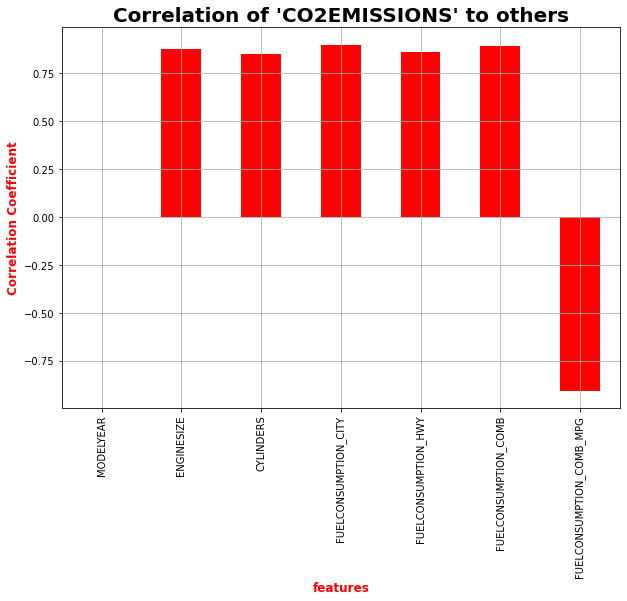

In [71]:
#Correlation of "CO2EMISSIONS" to other behaviors regarding the Coef. between -1 and 1
#2) 

X=df1.drop(['CO2EMISSIONS'],axis=1)
X.corrwith(df1['CO2EMISSIONS']).plot.bar(
        figsize = (10, 7), fontsize = 10,
        rot = 90, grid = True, color='r')

plt.title(r"Correlation of 'CO2EMISSIONS' to others", fontweight='bold', fontsize=20)
plt.xlabel("features", fontsize=12, fontweight= 'bold', color= "r")
plt.ylabel('Correlation Coefficient',fontsize=12, fontweight= 'bold', color= "r")

In [82]:
#Feature selecting for our multiple non-linear regression (different independent variables as X1 X2 X3)

#Our target (label)► Co2emission

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,8.5,33,196
1,2.4,4,9.6,29,221
2,1.5,4,5.9,48,136
3,3.5,6,11.1,25,255
4,3.5,6,10.6,27,244


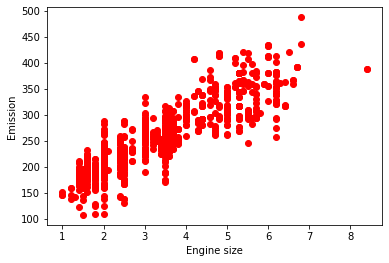

In [81]:
#1
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

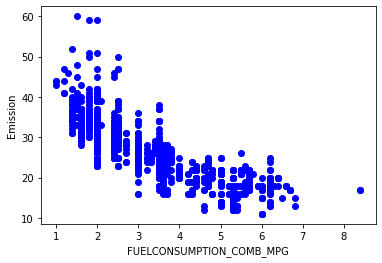

In [17]:
#2
plt.scatter(df.ENGINESIZE, df['FUELCONSUMPTION_COMB_MPG'],  color='b')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel("Emission")
plt.show()


In [84]:
#Split into test and train (80% train, 20% test):

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Building Simple Polynomial Regression: 

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

print(train_x[:3]) #The first 3 train data

poly = PolynomialFeatures(degree=2)  #degree 2 ►powers of 0, 1, 2
train_x_poly = poly.fit_transform(train_x)
train_x_poly

[[2. ]
 [2.4]
 [3.5]]


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [87]:
#writing the linear function: Y= x1+x2+X3

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.32614538 -1.32348891]]
Intercept:  [111.8216705]


Text(0, 0.5, 'Emission')

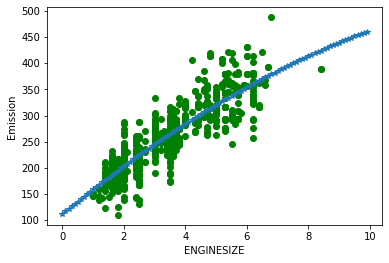

In [90]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='g')
XX = np.arange(0.0, 10.0, 0.1) #0-10 by 0.1
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '*' )
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")

# **Accuracy ► by R squared:**

In [92]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 22.82
Residual sum of squares (MSE): 915.37
R2-score: 0.80
